Loading and Plotting Raw Signals

In [1]:
import mne
from mne.io import read_raw_fieldtrip
from mnelab.io import read_raw
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
from scipy.signal import spectrogram
from copy import deepcopy

In [75]:
# Load the SPM file (assuming it's an MNE supported format, e.g., .fif)
source_path = "C:\\Users\\Juliette\\Research\\Projects\\ReSync_for_xdf\\sourcedata"  # replace with actual path
filename = "sub-002_ses-Fu12mMedOn01_task-MSST_acq-StimOff_mod-BrainSenseBip_run-1_part-1.mat"  # replace with actual filename
#raw = read_raw_fieldtrip(
    #join(source_path, filename),
    #info={},
    #data_name="data",
#)

raw = read_raw("C:\\Users\\Juliette\\Research\\Projects\\ReSync_for_xdf\\results\\sub003_mSST_DBS_ON\\SYNCHRONIZED_INTRACRANIAL_sub-003_ses-Fu24mMedOn01_task-MSST_acq-StimOnB_mod-BrainSenseBip_run-1.mat.set", preload=True)

# Adjusting the time
raw_times = raw.times - raw.times[0]

# Plotting raw signals (assuming wjn_plot_raw_signals is a custom function)
def plot_signals(times, data, chanlabels):
    plt.figure()
    for idx, label in enumerate(chanlabels):
        plt.plot(times, data[idx, :], label=label)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

plot_signals(raw_times, raw.get_data(), ['LFP_Stn_L_02','LFP_Stn_R_02'])
plt.show()


In [100]:
raw.ch_names

['LFP_Stn_L_02',
 'LFP_Stn_R_02',
 'LFP_Stn_L_02_PEAK11Hz_THR20-30_AVG3000ms',
 'LFP_Stn_R_02_PEAK26Hz_THR20-30_AVG3000ms',
 'STIM_L_110Hz_60us',
 'STIM_R_110Hz_60us']

In [ ]:
raw.info['sfreq']

Filtering

In [ ]:
raw.ch_names

In [76]:
%matplotlib qt

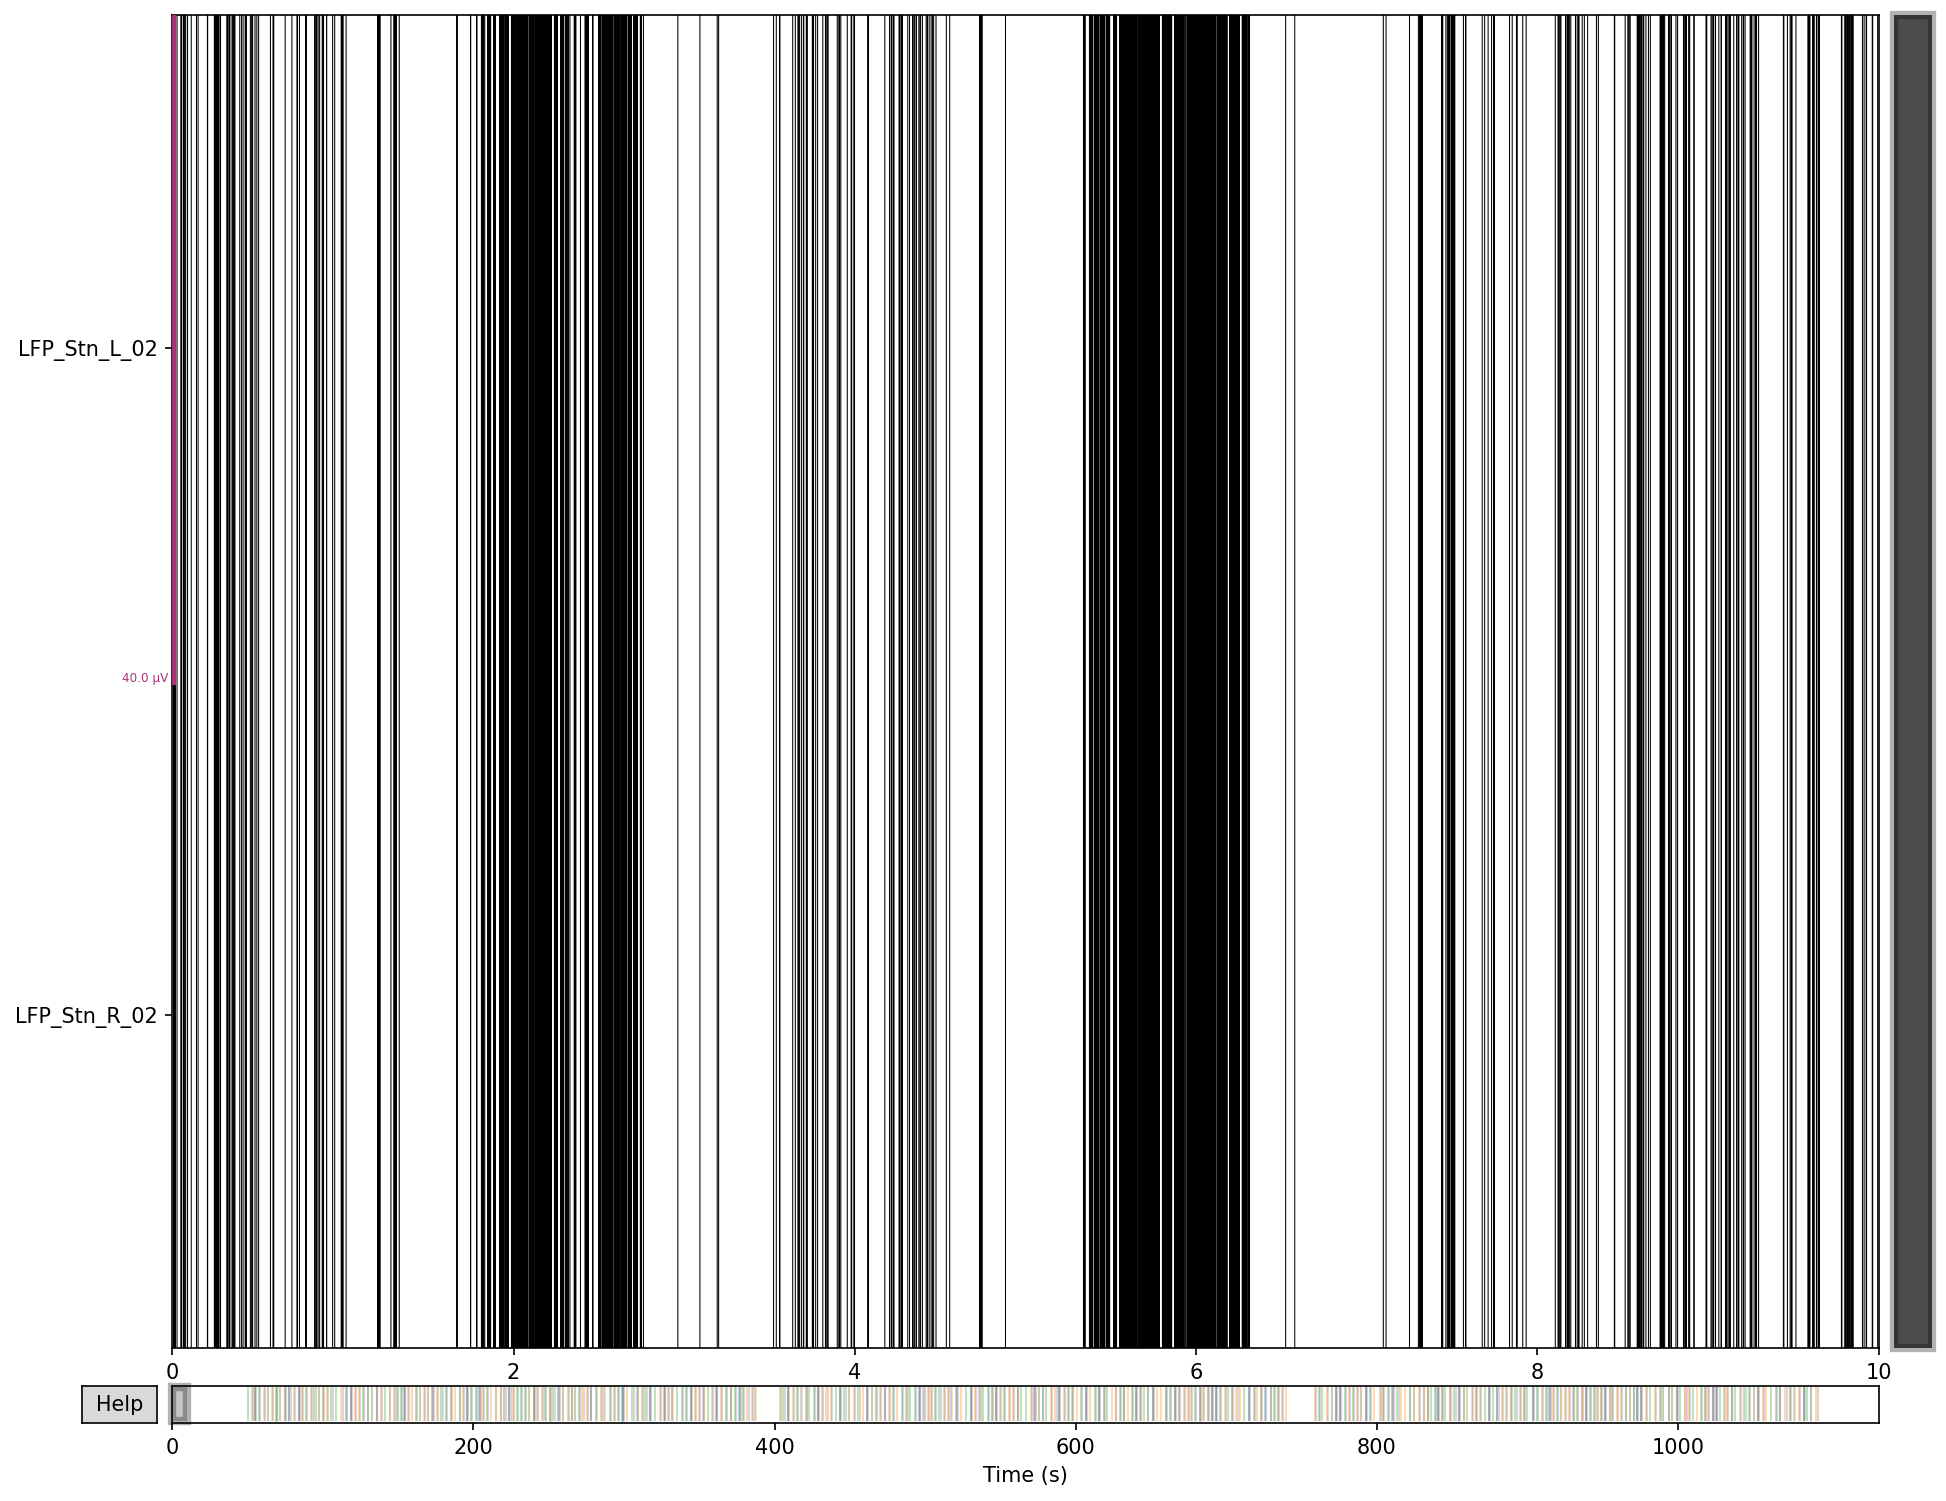

In [80]:
raw.plot(picks=['LFP_Stn_L_02','LFP_Stn_R_02'])

In [91]:
results_path = "C:\\Users\\Juliette\\Research\\Projects\\ephy_analysis\\results"  # replace with actual path
saving_path = join(results_path, "sub003 DBS ON")
saving_path

'C:\\Users\\Juliette\\Research\\Projects\\ephy_analysis\\results\\sub003 DBS ON'

In [105]:
L_chan = raw.get_data(picks='LFP_Stn_L_02')[0]
R_chan = raw.get_data(picks='LFP_Stn_R_02')[0]
stim_L_chan = raw.get_data(picks='STIM_L_110Hz_60us')[0]
stim_R_chan = raw.get_data(picks='STIM_R_110Hz_60us')[0]
timescale = np.arange(0, len(L_chan)/raw.info['sfreq'], 1/raw.info['sfreq'])

plt.plot(timescale,stim_L_chan)

In [114]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import spectrogram

L_chan = raw.get_data(picks='LFP_Stn_L_02')[0]
R_chan = raw.get_data(picks='LFP_Stn_R_02')[0]
stim_L_chan = raw.get_data(picks='STIM_L_110Hz_60us')[0]
stim_R_chan = raw.get_data(picks='STIM_R_110Hz_60us')[0]
timescale = np.arange(0, len(L_chan)/raw.info['sfreq'], 1/raw.info['sfreq'])

# Plot 1 data
frequencies_L, time_sectors_L, Sxx_L = spectrogram(L_chan, raw.info['sfreq'])

# Plot 2 data
frequencies_R, time_sectors_R, Sxx_R = spectrogram(R_chan, raw.info['sfreq'])

# Plot 3 data
average_Sxx_L = np.mean(Sxx_L, axis=1)
Sxx_std_L = np.std(Sxx_L, axis=1)  # standard deviation of each frequency row
Sxx_sem_L = Sxx_std_L / np.sqrt(Sxx_L.shape[1])

# Plot 4 data
average_Sxx_R = np.mean(Sxx_R, axis=1)
Sxx_std_R = np.std(Sxx_R, axis=1)  # standard deviation of each frequency row
Sxx_sem_R = Sxx_std_R / np.sqrt(Sxx_R.shape[1])

# Create a figure with 2x2 layout
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1: Top left
axs[0, 0].pcolormesh(time_sectors_L, frequencies_L, Sxx_L, vmin=0, vmax=3)
axs[0, 0].plot(timescale, stim_L_chan * 30, color='white')
axs[0, 0].set_ylim(1, 125)
axs[0, 0].set_ylabel('Frequency [Hz]')
axs[0, 0].set_xlabel('Time [sec]')
axs[0, 0].set_title('Spectrogram of LFP_Stn_L_02')

# Plot 2: Top right
axs[0, 1].pcolormesh(time_sectors_R, frequencies_R, Sxx_R, vmin=0, vmax=3)
axs[0, 1].plot(timescale, stim_R_chan * 30, color='white')
axs[0, 1].set_ylim(1, 125)
axs[0, 1].set_ylabel('Frequency [Hz]')
axs[0, 1].set_xlabel('Time [sec]')
axs[0, 1].set_title('Spectrogram of LFP_Stn_R_13')

# Plot 3: Bottom left
axs[1, 0].plot(average_Sxx_L)
axs[1, 0].set_title('Average Sxx_L')
axs[1, 0].set_ylabel('Average Power')
axs[1, 0].set_xlabel('Frequency [Hz]')

# Plot 4: Bottom right
axs[1, 1].plot(average_Sxx_R)
axs[1, 1].set_title('Average Sxx_R')
axs[1, 1].set_ylabel('Average Power')
axs[1, 1].set_xlabel('Frequency [Hz]')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig(join(saving_path, 'spectrogram and PSD raw signals.png'))

# Show the figure
plt.show()


Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 5.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 4.00 Hz)
- Filter length: 413 samples (1.652 s)



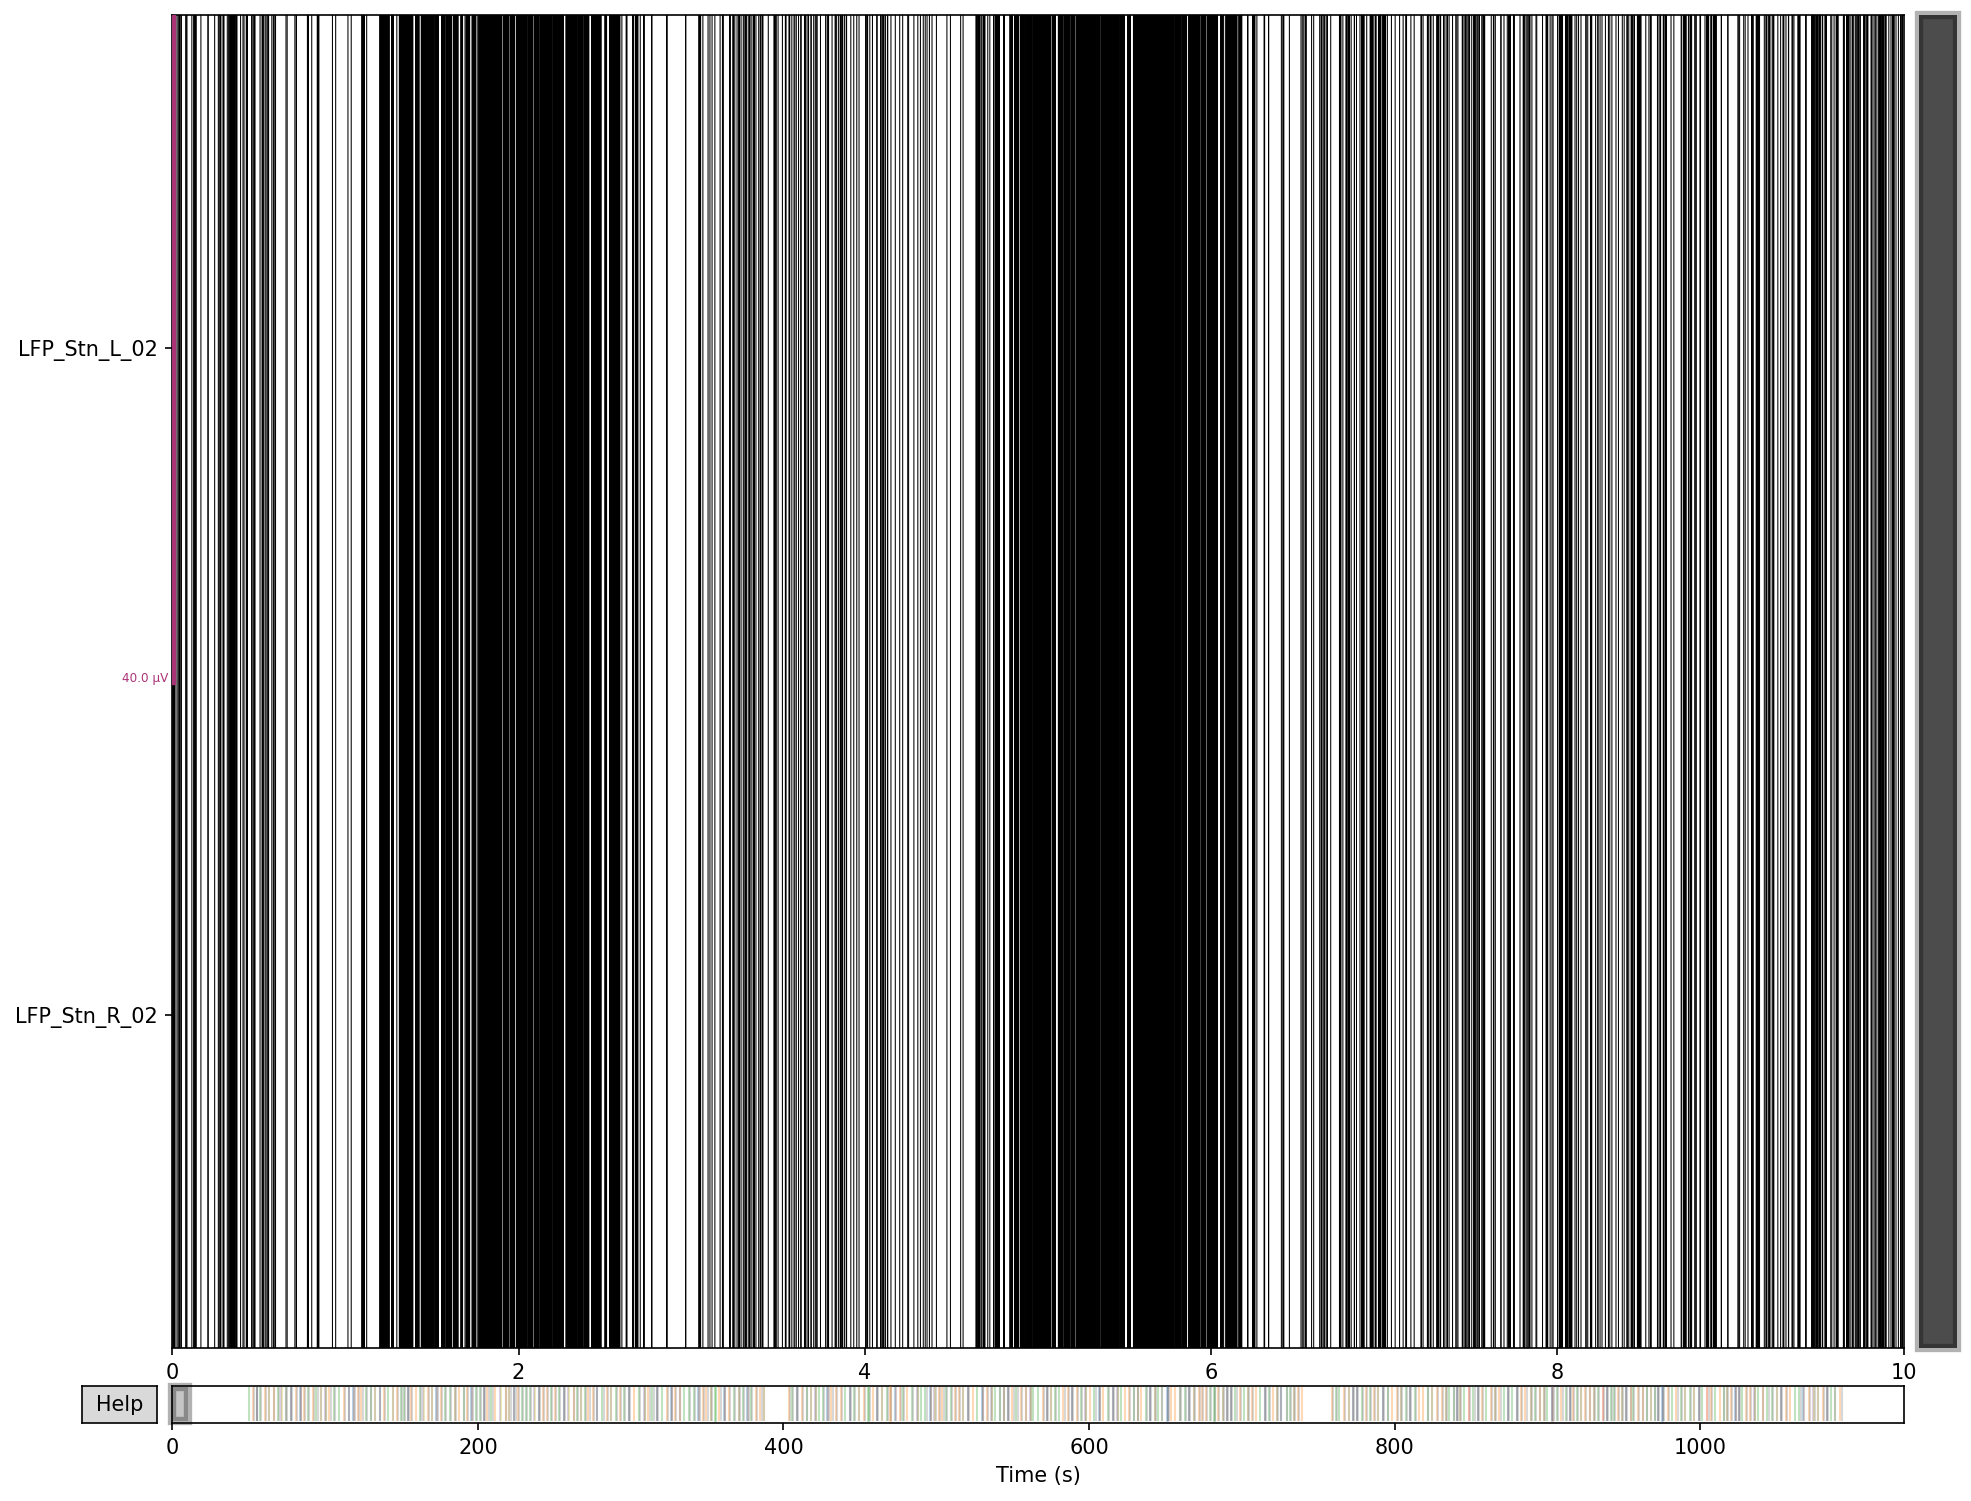

In [115]:
# Highpass filter at 1 Hz
lowpass_filtered_raw = deepcopy(raw).filter(l_freq=5, h_freq=None,picks=['LFP_Stn_L_02','LFP_Stn_R_02'])
lowpass_filtered_raw.plot(picks=['LFP_Stn_L_02','LFP_Stn_R_02'])


Filtering a subset of channels. The highpass and lowpass values in the measurement info will not be updated.
Filtering raw data in 1 contiguous segment
Setting up low-pass filter at 90 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal lowpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Upper passband edge: 90.00 Hz
- Upper transition bandwidth: 22.50 Hz (-6 dB cutoff frequency: 101.25 Hz)
- Filter length: 37 samples (0.148 s)



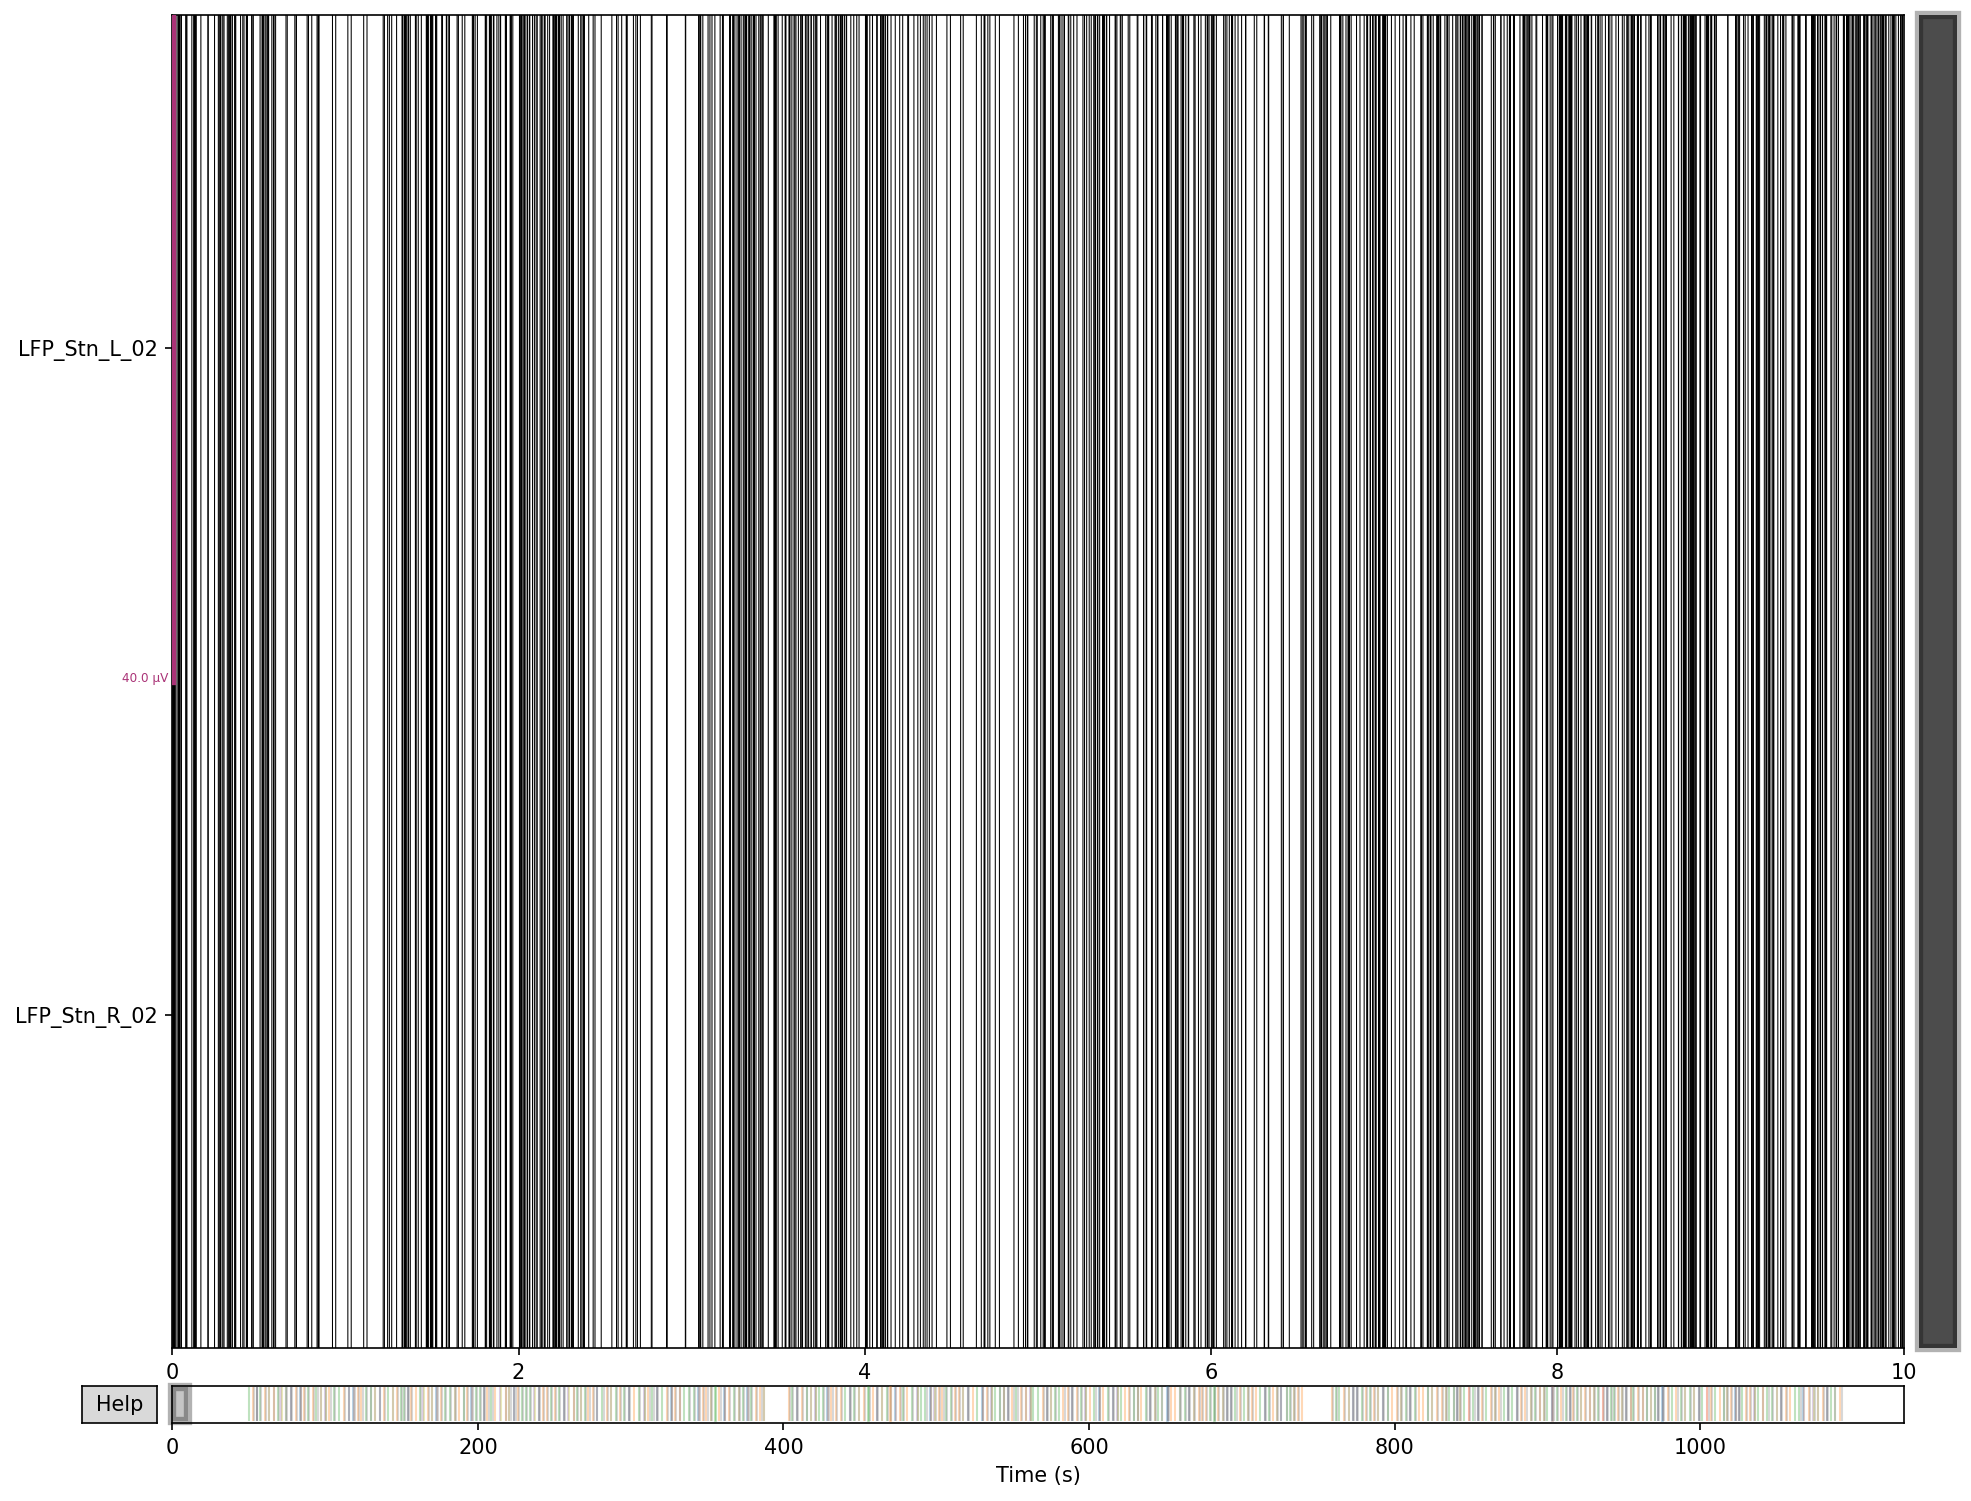

In [116]:
# Lowpass filter at 90 Hz
highpass_filtered_raw = deepcopy(lowpass_filtered_raw).filter(l_freq=None, h_freq=90, picks=['LFP_Stn_L_02','LFP_Stn_R_02'])
highpass_filtered_raw.plot(picks=['LFP_Stn_L_02','LFP_Stn_R_02'])

Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1651 samples (6.604 s)



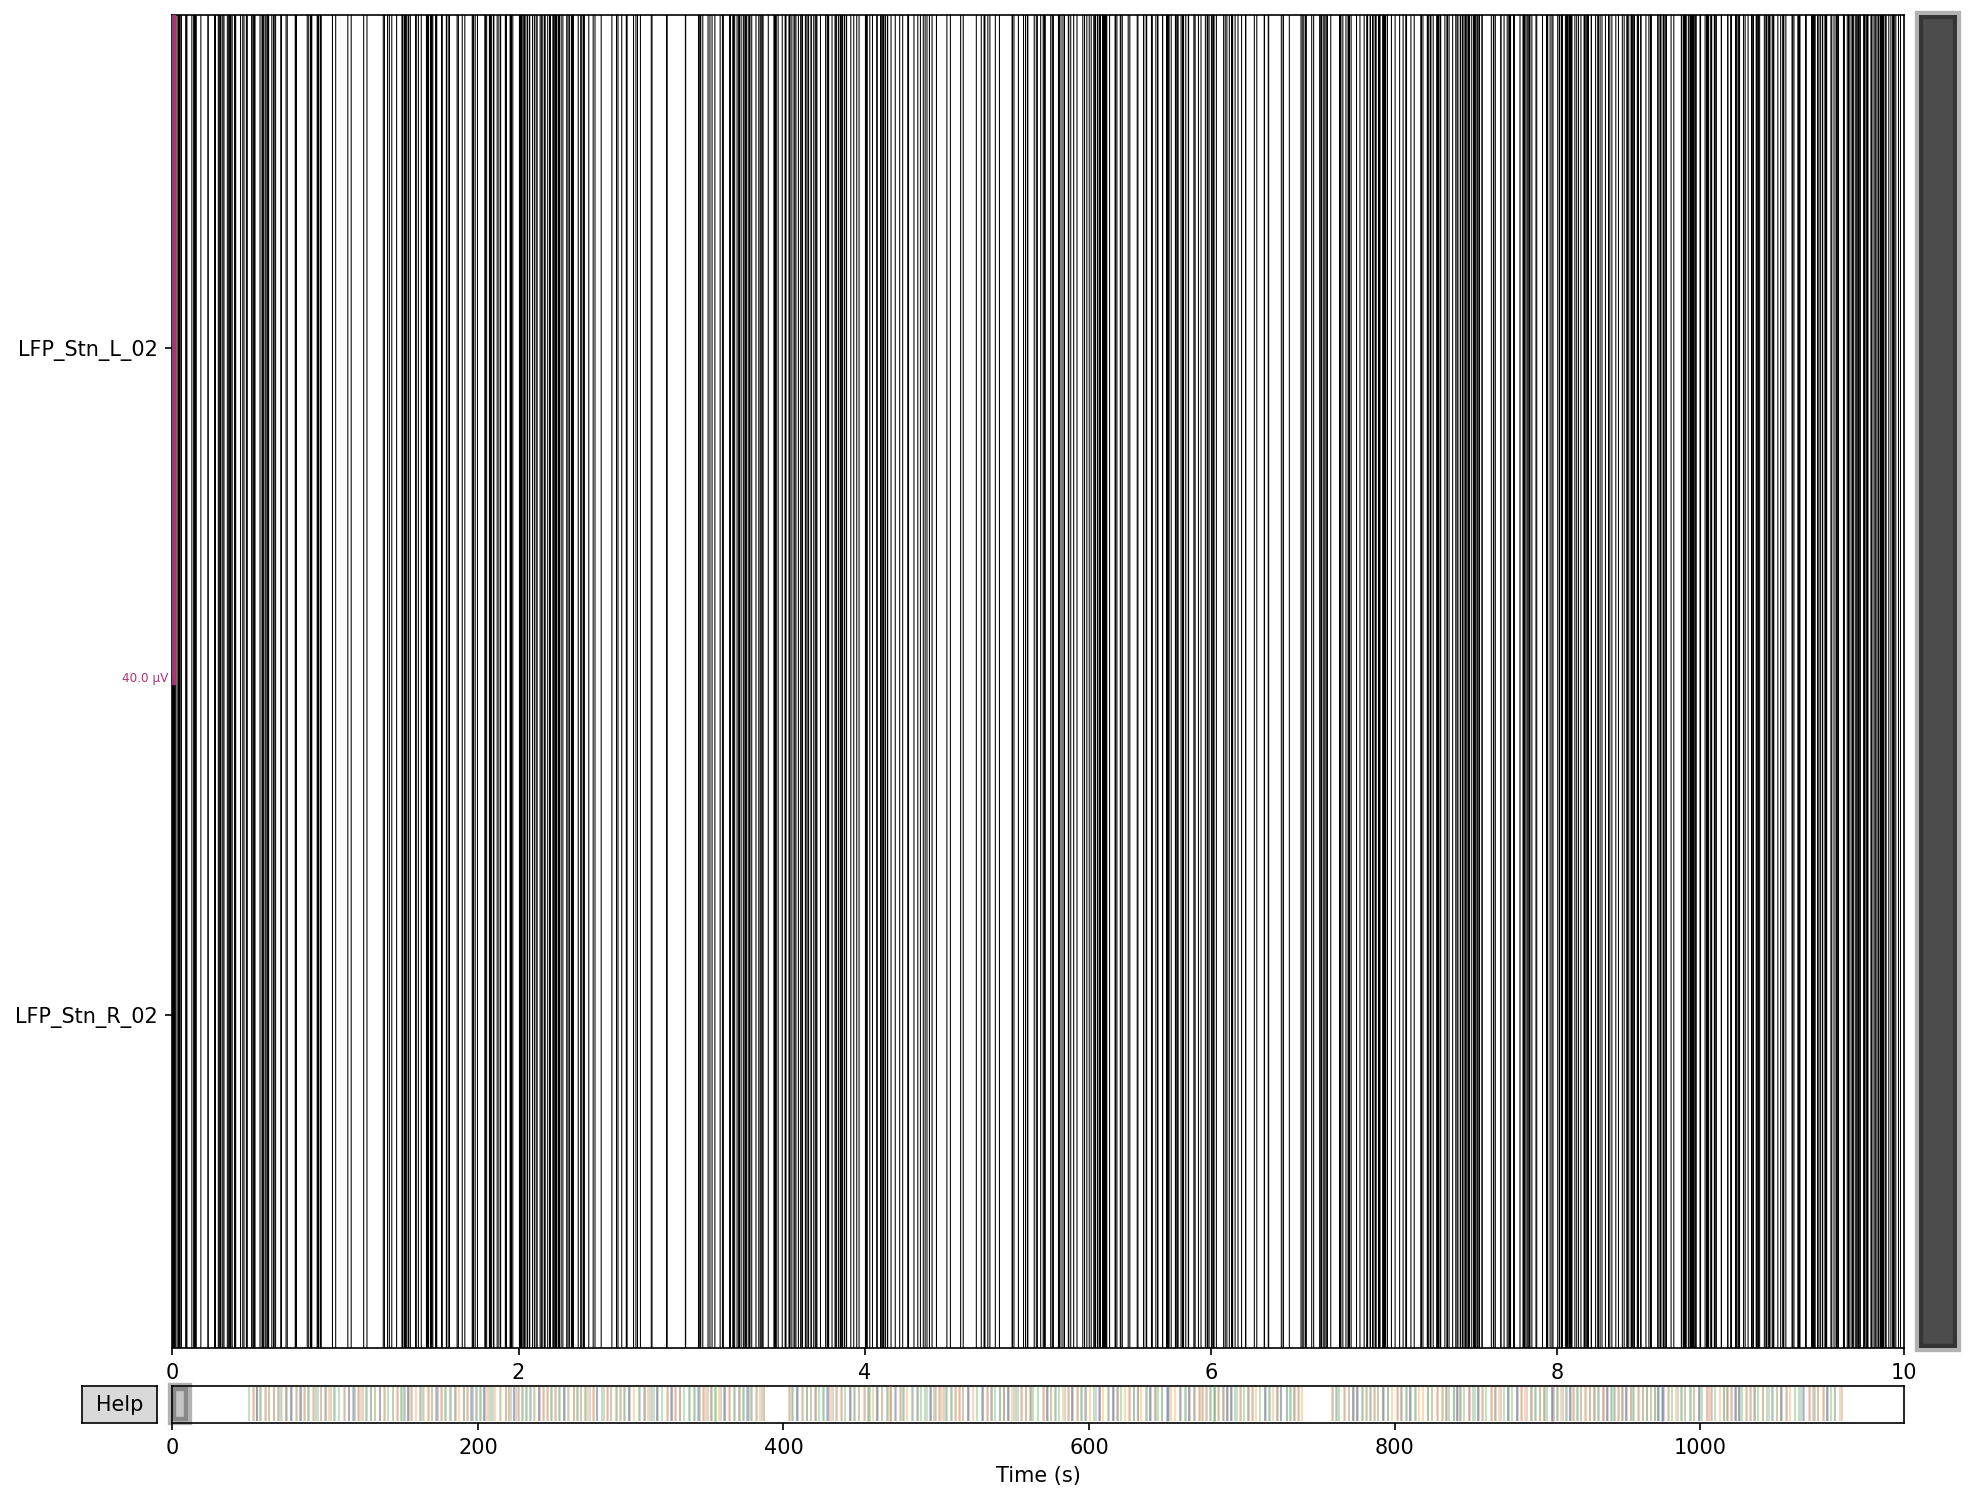

In [117]:
# Notch filter around 50 Hz (stop band)
notch_filtered_signal = deepcopy(highpass_filtered_raw).notch_filter(freqs=np.arange(50, 125, 50), picks=['LFP_Stn_L_02','LFP_Stn_R_02'])
notch_filtered_signal.plot(picks=['LFP_Stn_L_02','LFP_Stn_R_02'])

In [119]:
L_chan = notch_filtered_signal.get_data(picks='LFP_Stn_L_02')[0]
R_chan = notch_filtered_signal.get_data(picks='LFP_Stn_R_02')[0]

# Plot 1 data
frequencies_L, time_sectors_L, Sxx_L = spectrogram(L_chan, raw.info['sfreq'])

# Plot 2 data
frequencies_R, time_sectors_R, Sxx_R = spectrogram(R_chan, raw.info['sfreq'])

# Plot 3 data
average_Sxx_L = np.mean(Sxx_L, axis=1)
Sxx_std_L = np.std(Sxx_L, axis=1)  # standard deviation of each frequency row
Sxx_sem_L = Sxx_std_L / np.sqrt(Sxx_L.shape[1])

# Plot 4 data
average_Sxx_R = np.mean(Sxx_R, axis=1)
Sxx_std_R = np.std(Sxx_R, axis=1)  # standard deviation of each frequency row
Sxx_sem_R = Sxx_std_R / np.sqrt(Sxx_R.shape[1])

# Create a figure with 2x2 layout
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1: Top left
axs[0, 0].pcolormesh(time_sectors_L, frequencies_L, Sxx_L, vmin=0, vmax=3)
axs[0, 0].set_ylim(5, 125)
axs[0, 0].set_ylabel('Frequency [Hz]')
axs[0, 0].set_xlabel('Time [sec]')
axs[0, 0].set_title('Spectrogram of LFP_Stn_L_02')

# Plot 2: Top right
axs[0, 1].pcolormesh(time_sectors_R, frequencies_R, Sxx_R, vmin=0, vmax=3)
axs[0, 1].set_ylim(5, 125)
axs[0, 1].set_ylabel('Frequency [Hz]')
axs[0, 1].set_xlabel('Time [sec]')
axs[0, 1].set_title('Spectrogram of LFP_Stn_R_13')

# Plot 3: Bottom left
axs[1, 0].plot(average_Sxx_L)
axs[1, 0].set_xlim(5, 125)
axs[1, 0].set_title('Average Sxx_L')
axs[1, 0].set_ylabel('Average Power')
axs[1, 0].set_xlabel('Frequency [Hz]')

# Plot 4: Bottom right
axs[1, 1].plot(average_Sxx_R)
axs[1, 1].set_xlim(5, 125)
axs[1, 1].set_title('Average Sxx_R')
axs[1, 1].set_ylabel('Average Power')
axs[1, 1].set_xlabel('Frequency [Hz]')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig(join(saving_path, 'spectrogram and PSD filtered signals.png'))

# Show the figure
plt.show()

In [120]:
L_chan = notch_filtered_signal.get_data(picks='LFP_Stn_L_02')[0]
R_chan = notch_filtered_signal.get_data(picks='LFP_Stn_R_02')[0]

# Plot 1 data
frequencies_L, time_sectors_L, Sxx_L = spectrogram(L_chan, raw.info['sfreq'])

# Plot 2 data
frequencies_R, time_sectors_R, Sxx_R = spectrogram(R_chan, raw.info['sfreq'])

# Plot 3 data
average_Sxx_L = np.mean(Sxx_L, axis=1)
Sxx_std_L = np.std(Sxx_L, axis=1)  # standard deviation of each frequency row
Sxx_sem_L = Sxx_std_L / np.sqrt(Sxx_L.shape[1])

# Plot 4 data
average_Sxx_R = np.mean(Sxx_R, axis=1)
Sxx_std_R = np.std(Sxx_R, axis=1)  # standard deviation of each frequency row
Sxx_sem_R = Sxx_std_R / np.sqrt(Sxx_R.shape[1])

# Create a figure with 2x2 layout
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot 1: Top left
axs[0, 0].pcolormesh(time_sectors_L, frequencies_L, Sxx_L, vmin=0, vmax=3)
axs[0, 0].set_ylim(5, 40)
axs[0, 0].set_ylabel('Frequency [Hz]')
axs[0, 0].set_xlabel('Time [sec]')
axs[0, 0].set_title('Spectrogram of LFP_Stn_L_02')

# Plot 2: Top right
axs[0, 1].pcolormesh(time_sectors_R, frequencies_R, Sxx_R, vmin=0, vmax=3)
axs[0, 1].set_ylim(5, 40)
axs[0, 1].set_ylabel('Frequency [Hz]')
axs[0, 1].set_xlabel('Time [sec]')
axs[0, 1].set_title('Spectrogram of LFP_Stn_R_13')

# Plot 3: Bottom left
axs[1, 0].plot(average_Sxx_L)
axs[1, 0].set_xlim(5, 40)
axs[1, 0].set_title('Average Sxx_L')
axs[1, 0].set_ylabel('Average Power')
axs[1, 0].set_xlabel('Frequency [Hz]')

# Plot 4: Bottom right
axs[1, 1].plot(average_Sxx_R)
axs[1, 1].set_xlim(5, 40)
axs[1, 1].set_title('Average Sxx_R')
axs[1, 1].set_ylabel('Average Power')
axs[1, 1].set_xlabel('Frequency [Hz]')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.savefig(join(saving_path, 'spectrogram and PSD filtered signals zoomed.png'))

# Show the figure
plt.show()

In [ ]:
# Plotting filtered signals
plot_signals(notch_filtered_signal.times, notch_filtered_signal.get_data(), ['LFP_Stn_L_02','LFP_Stn_R_02'])
plt.show()

Time-Frequency Analysis with consecutive fourier transforms (wavelets?)

In [ ]:
L_chan = notch_filtered_signal.get_data(picks='LFP_Stn_L_02')[0]
R_chan = notch_filtered_signal.get_data(picks='LFP_Stn_R_02')[0]


In [ ]:
L_chan

In [ ]:
%matplotlib inline

In [ ]:
frequencies_L, time_sectors_L, Sxx_L = spectrogram(L_chan, raw.info['sfreq'])
plt.pcolormesh(time_sectors_L, frequencies_L, Sxx_L,vmin=0, vmax=3)
plt.ylim(5, 50)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of LFP_Stn_L_02')
plt.show()

In [ ]:
average_Sxx_L = np.mean(Sxx_L, axis=1)
Sxx_std_L = np.std(Sxx_L, axis=1) # standard deviation of each frequency row
Sxx_sem_L = Sxx_std_L / np.sqrt(Sxx_L.shape[1])
plt.plot(average_Sxx_L)


In [ ]:
frequencies_R, time_sectors_R, Sxx_R = spectrogram(R_chan, raw.info['sfreq'])
plt.pcolormesh(time_sectors_R, frequencies_R, Sxx_R, vmin=0, vmax=3)
plt.ylim(0, 50)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of LFP_Stn_R_13')
plt.show()

In [ ]:
average_Sxx_R = np.mean(Sxx_R, axis=1)
Sxx_std_R = np.std(Sxx_R, axis=1) # standard deviation of each frequency row
Sxx_sem_R = Sxx_std_R / np.sqrt(Sxx_R.shape[1])
plt.plot(average_Sxx_R)


In [ ]:
plt.plot(average_Sxx_L, 'b')
plt.fill_between(range(len(average_Sxx_L)), average_Sxx_L - Sxx_sem_L, average_Sxx_L + Sxx_sem_L, color='b', alpha=0.2)
plt.plot(average_Sxx_R, 'g')
plt.fill_between(range(len(average_Sxx_R)), average_Sxx_R - Sxx_sem_R, average_Sxx_R + Sxx_sem_R, color='g', alpha=0.2)
# add labels to explain the colors of the lines:
plt.legend(['LFP_Stn_L_13', 'LFP_Stn_L_13 sd', 'LFP_Stn_R_13', 'LFP_Stn_R_13 sd'])

In [ ]:
##### Function from Jenny's notebook #####

from scipy.signal import hann

def fourier_transform(signal:None):
    """
    Fourier transform with 50% overlap, window length of 1 second
    
    """
    fs = 250
    window = fs # window length = 1 sec; frequencies will be from 0 to 125 Hz, 125Hz = Nyquist = fs/2
    noverlap = window // 2 # 50% overlap of windows

    window = hann(window, sym=False)

    # compute spectrogram with Fourier Transforms

    f,time_sectors,Sxx = spectrogram(x=signal, fs=fs, window=window, noverlap=noverlap,  scaling='density', mode='psd', axis=0)
    # f = frequencies 0-125 Hz (Maximum = Nyquist frequency = sfreq/2)
    # time_sectors = sectors 0.5 - 20.5 s in 0.5 steps (in total 21 time sectors)
    # Sxx = 126 arrays with 21 values each of PSD [µV^2/Hz], for each frequency bin PSD values of each time sector
    # Sxx = 126 frequency rows, 21 time sector columns

    # average all 21 Power spectra of all time sectors 
    average_Sxx = np.mean(Sxx, axis=1) # axis = 1 -> mean of each column: in total 21x126 mean values for each frequency
                

    #################### CALCULATE THE STANDARD ERROR OF MEAN ####################
    # SEM = standard deviation / square root of sample size
    Sxx_std = np.std(Sxx, axis=1) # standard deviation of each frequency row
    Sxx_sem = Sxx_std / np.sqrt(Sxx.shape[1]) # sample size = 21 time vectors -> sem with 126 values

    return {
        "freq": f,
        "time_sectors": time_sectors,
        "Sxx": Sxx,
        "average_Sxx": average_Sxx,
        "Sxx_sem": Sxx_sem
    }


In [ ]:
fourier_transform_lfp_L = fourier_transform(L_chan)

In [ ]:
fourier_transform_lfp_L

Working with EPOCHS

In [6]:
%matplotlib qt

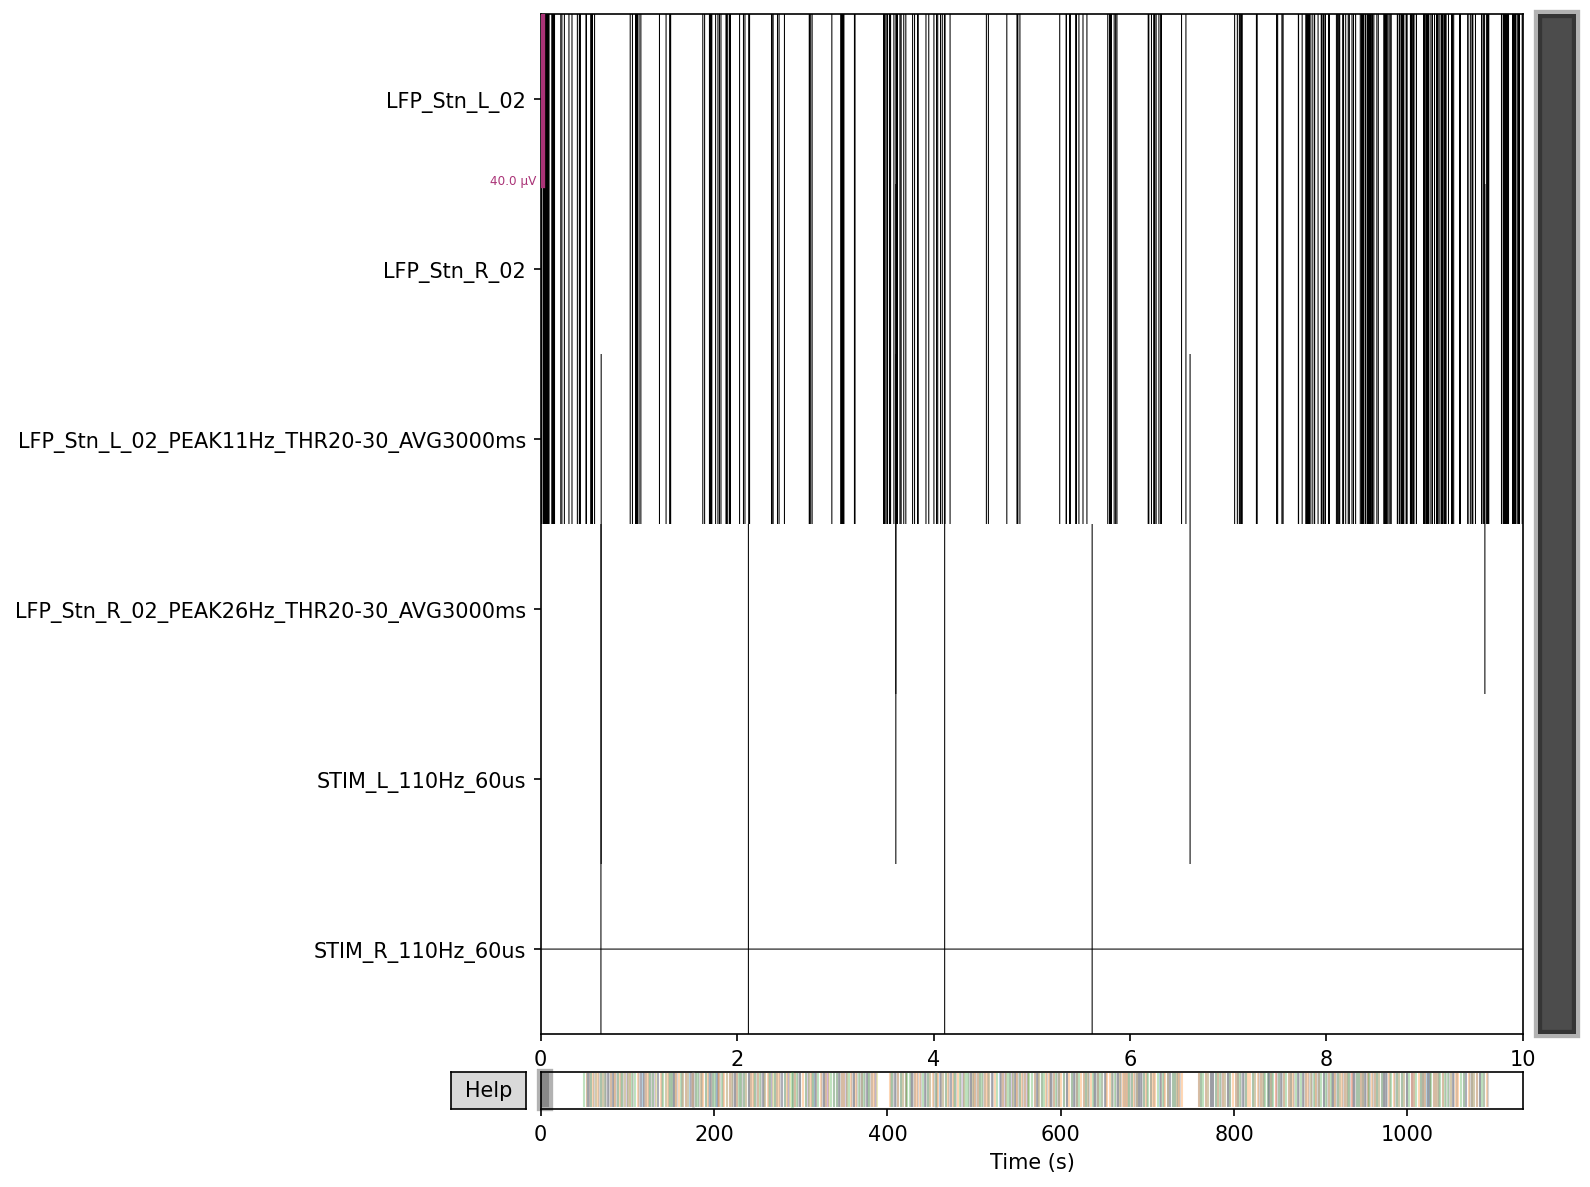

Channels marked as bad:
['LFP_Stn_L_02_PEAK11Hz_THR20-30_AVG3000ms', 'LFP_Stn_R_02_PEAK26Hz_THR20-30_AVG3000ms', 'STIM_L_110Hz_60us', 'STIM_R_110Hz_60us']


In [7]:
notch_filtered_signal.plot()

In [8]:
events, _ = mne.events_from_annotations(notch_filtered_signal)


Used Annotations descriptions: ['GC', 'GF', 'GO', 'GS', 'continue', 'early', 'resp', 'stop']


In [11]:
tmin, tmax = -1, 4
event_ids = dict(GC=1, GF=2, GO=3, GS=4, Cont=5, early=6, resp=7, stop=8)  # map event IDs to tasks

data = deepcopy(notch_filtered_signal)
epochs = mne.Epochs(data, events, event_id=[3, 8, 4, 2, 5, 1], tmin=tmin - 0.5, tmax= tmax + 0.5, baseline=None, preload=True)


Not setting metadata
480 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 480 events and 1501 original time points ...
0 bad epochs dropped


In [ ]:
event_ids

In [ ]:
epochs.plot(events=events, n_channels=2)

make ERDS map:

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import seaborn as sns
from matplotlib.colors import TwoSlopeNorm

import mne
from mne.datasets import eegbci
from mne.io import concatenate_raws, read_raw_edf
from mne.stats import permutation_cluster_1samp_test as pcluster_test


In [13]:
freqs = np.arange(2, 36)  # frequencies from 2-35Hz
vmin, vmax = -1, 1.5  # set min and max ERDS values in plot
baseline = (-1, 0)  # baseline interval (in s)
cnorm = TwoSlopeNorm(vmin=vmin, vcenter=0, vmax=vmax)  # min, center & max ERDS

kwargs = dict(
    n_permutations=100, step_down_p=0.05, seed=1, buffer_size=None, out_type="mask"
)  # for cluster test

In [14]:
tfr = epochs.compute_tfr(
    method="multitaper",
    freqs=freqs,
    n_cycles=freqs,
    use_fft=True,
    return_itc=False,
    average=False,
    decim=2,
)

In [15]:
tfr.crop(tmin, tmax).apply_baseline(baseline, mode="percent")

Applying baseline correction (mode: percent)


Data type,Power Estimates
Data source,Epochs
Number of epochs,480
Dims,"epoch, channel, freq, time"
Estimation method,multitaper
Number of channels,2
Number of timepoints,627
Number of frequency bins,34
Frequency range,2.00 – 35.00 Hz


In [70]:
tfr_ev= tfr[3]

In [71]:
tfr_ev

Data type,Power Estimates
Data source,Epochs
Number of epochs,1
Dims,"epoch, channel, freq, time"
Estimation method,multitaper
Number of channels,2
Number of timepoints,627
Number of frequency bins,34
Frequency range,2.00 – 35.00 Hz


In [73]:
# plot tfr for each condition:
tfr_ev.plot(
    picks='LFP_Stn_R_02',
    baseline=baseline,
    mode="percent",
    vmin=vmin,
    vmax=vmax,
    cmap="RdBu_r",
    colorbar=True,
    show=True,
)

Applying baseline correction (mode: percent)


C:\Users\Juliette\AppData\Local\Temp\ipykernel_2136\573549325.py:2: FutureWarning: Parameters `vmin` and `vmax` are deprecated, use `vlim` instead.
  tfr_ev.plot(


[<Figure size 960x720 with 2 Axes>]

In [44]:
for event in [3, 8, 4, 2, 5, 1]:
    # select desired epochs for visualization
    tfr_ev = tfr[event]
    fig, axes = plt.subplots(
        1, 4, figsize=(12, 4), gridspec_kw={"width_ratios": [10, 10, 10, 1]}
    )
    for ch, ax in enumerate(axes[:-1]):  # for each channel
        # positive clusters
        _, c1, p1, _ = pcluster_test(X=tfr_ev.data[:, ch], threshold=None, n_permutations=100, tail=1, seed=1, step_down_p=0.05, out_type='mask', buffer_size=None)
        # negative clusters
        _, c2, p2, _ = pcluster_test(X=tfr_ev.data[:, ch], threshold=None, n_permutations=100, tail=-1, seed=1, step_down_p=0.05, out_type='mask', buffer_size=None)

        
        # note that we keep clusters with p <= 0.05 from the combined clusters
        # of two independent tests; in this example, we do not correct for
        # these two comparisons
        c = np.stack(c1 + c2, axis=2)  # combined clusters
        p = np.concatenate((p1, p2))  # combined p-values
        mask = c[..., p <= 0.05].any(axis=-1)

        # plot TFR (ERDS map with masking)
        tfr_ev.average().plot(
            [ch],
            cmap="RdBu",
            cnorm=cnorm,
            axes=ax,
            colorbar=False,
            show=False,
            mask=mask,
            mask_style="mask",
        )

        ax.set_title(epochs.ch_names[ch], fontsize=10)
        ax.axvline(0, linewidth=1, color="black", linestyle=":")  # event
        if ch != 0:
            ax.set_ylabel("")
            ax.set_yticklabels("")
    fig.colorbar(axes[0].images[-1], cax=axes[-1]).ax.set_yscale("linear")
    fig.suptitle(f"ERDS ({event})")
    plt.show()

Using a threshold of nan
stat_fun(H1): min=nan max=nan
Running initial clustering …
Found 0 clusters
Using a threshold of nan
stat_fun(H1): min=nan max=nan
Running initial clustering …
Found 0 clusters


c:\Users\Juliette\anaconda3\envs\resync_xdf\Lib\site-packages\numpy\core\fromnumeric.py:3787: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\Juliette\anaconda3\envs\resync_xdf\Lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
C:\Users\Juliette\AppData\Local\Temp\ipykernel_2136\4193274314.py:9: RuntimeWarning: No clusters found, returning empty H0, clusters, and cluster_pv
  _, c1, p1, _ = pcluster_test(X=tfr_ev.data[:, ch], threshold=None, n_permutations=100, tail=1, seed=1, step_down_p=0.05, out_type='mask', buffer_size=None)
C:\Users\Juliette\AppData\Local\Temp\ipykernel_2136\4193274314.py:11: RuntimeWarning: No clusters found, returning empty H0, clusters, and cluster_pv
  _, c2, p2, _ = pcluster_test(X=tfr_ev.data[:, ch], threshold=None, n_permutations=100, tail=-1, seed=1, step_down_p=0.05, out_type='mask', buffer_size=None)


ValueError: need at least one array to stack